Spotlight - Topic Modeling - Z1968860

Import ibraries for data visulaization, plotting and nl processing




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [ ]:
import pandas as pd


Load the data

In [ ]:
train_df = pd.read_csv('/content/train.csv', index_col = ['ID'])

Data Preprocessing - Modify the index for both training and test datasets.

In [ ]:
train_df.index = train_df.index - 1

In [ ]:
test_df = pd.read_csv('/content/test.csv', index_col = ['ID'])

In [ ]:
test_df.index = test_df.index - len(train_df) - 1

Data Inspection

In [ ]:
train_df

TITLE  \
ID                                                         
0            Reconstructing Subject-Specific Effect Maps   
1                     Rotation Invariance Neural Network   
2      Spherical polyharmonics and Poisson kernels fo...   
3      A finite element approximation for the stochas...   
4      Comparative study of Discrete Wavelet Transfor...   
...                                                  ...   
20967  Contemporary machine learning: a guide for pra...   
20968  Uniform diamond coatings on WC-Co hard alloy c...   
20969  Analysing Soccer Games with Clustering and Con...   
20970  On the Efficient Simulation of the Left-Tail o...   
20971   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Computer Science  \
ID                                                                           
0        Predictive models allow subject-specific inf...                 1   
1        Rotation invariance and translation invarian...                 1   
2        We introduce and develop the notion of spher...                 0   
3        The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4        Fourier-transform infra-red (FTIR) spectra o...                 1   
...                                                  ...               ...   
20967    Machine learning is finding increasingly bro...                 1   
20968    Polycrystalline diamond coatings have been g...                 0   
20969    We present a new approach for identifying si...                 1   
20970    The sum of Log-normal variates is encountere...                 0   
20971    Recently, optional stopping has been a subje...                 0   

       Physics  Mathematics  Statistics  Quantitative Biology  \
ID                                                              
0            0            0           0                     0   
1            0            0           0                     0   
2            0            1           0                     0   
3            0            1           0                     0   
4            0            0           1                     0   
...        ...          ...         ...                   ...   
20967        1            0           0                     0   
20968        1            0           0                     0   
20969        0            0           0                     0   
20970        0            1           1                     0   
20971        0            1           1                     0   

       Quantitative Finance  
ID                           
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
20967                     0  
20968                     0  
20969                     0  
20970                     0  
20971                     0  

[20972 rows x 8 columns]

In [ ]:
test_df

TITLE  \
ID                                                        
0     Closed-form Marginal Likelihood in Gamma-Poiss...   
1     Laboratory mid-IR spectra of equilibrated and ...   
2            Case For Static AMSDU Aggregation in WLANs   
3     The $Gaia$-ESO Survey: the inner disk intermed...   
4     Witness-Functions versus Interpretation-Functi...   
...                                                 ...   
8984  Supporting mixed-datatype matrix multiplicatio...   
8985        An axiomatic basis for Blackwell optimality   
8986  GeneVis - An interactive visualization tool fo...   
8987  Quantifying the causal effect of speed cameras...   
8988                      Cube-magic labelings of grids   

                                               ABSTRACT  
ID                                                       
0       We present novel understandings of the Gamma...  
1       Meteorites contain minerals from Solar Syste...  
2       Frame aggregation is a mechanism by which mu...  
3       Milky Way open clusters are very diverse in ...  
4       Proving that a cryptographic protocol is cor...  
...                                                 ...  
8984    We approach the problem of implementing mixe...  
8985    In the theory of Markov decision processes (...  
8986    GeneVis is a web-based tool to visualize com...  
8987    This paper quantifies the effect of speed ca...  
8988    We show that the vertices and edges of a $d$...  

[8989 rows x 2 columns]

Accessing title column of first row

In [ ]:
train_df['TITLE'][0]

'Reconstructing Subject-Specific Effect Maps'

Accessing abstract column of first row

In [ ]:
train_df['ABSTRACT'][0]

"  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used with different binary classifiers in a diagn

In [ ]:
import re

Text Cleaning

In [ ]:
def clean_text(text):
    text = text.strip()
    pattern = r'\n'
    text_clean = re.sub(pattern,' ', text)
    return text_clean

In [ ]:
train_df['ABSTRACT'] = train_df['ABSTRACT'].apply(lambda x: clean_text(x))

In [ ]:
train_df['ABSTRACT'][0]

"Predictive models allow subject-specific inference when analyzing disease related alterations in neuroimaging data. Given a subject's data, inference can be made at two levels: global, i.e. identifiying condition presence for the subject, and local, i.e. detecting condition effect on each individual measurement extracted from the subject's data. While global inference is widely used, local inference, which can be used to form subject-specific effect maps, is rarely used because existing models often yield noisy detections composed of dispersed isolated islands. In this article, we propose a reconstruction method, named RSM, to improve subject-specific detections of predictive modeling approaches and in particular, binary classifiers. RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers. The proposed method is a wrapper-type algorithm that can be used with different binary classifiers in a diagnostic manner, 

Creating textual data/ making the data more structured

In [ ]:
train_df['Text'] = train_df['TITLE'] + ". " + train_df['ABSTRACT']

In [ ]:
train_df['Text'][0]

"Reconstructing Subject-Specific Effect Maps. Predictive models allow subject-specific inference when analyzing disease related alterations in neuroimaging data. Given a subject's data, inference can be made at two levels: global, i.e. identifiying condition presence for the subject, and local, i.e. detecting condition effect on each individual measurement extracted from the subject's data. While global inference is widely used, local inference, which can be used to form subject-specific effect maps, is rarely used because existing models often yield noisy detections composed of dispersed isolated islands. In this article, we propose a reconstruction method, named RSM, to improve subject-specific detections of predictive modeling approaches and in particular, binary classifiers. RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers. The proposed method is a wrapper-type algorithm that can be used with differen

In [ ]:
test_df['ABSTRACT'] = test_df['ABSTRACT'].apply(lambda x: clean_text(x))

Combine the title and abstract to create a new 'Text' column.

In [ ]:
test_df['Text'] = test_df['TITLE'] + " " + test_df['ABSTRACT']

In [ ]:
test_df['Text'][0]

'Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties.'

Data visualization -distribution of research papers across different genres

In [ ]:
values = train_df[['Computer Science', 'Physics', 'Mathematics', 'Statistics','Quantitative Biology','Quantitative Finance']].sum(axis = 0)

In [ ]:
values.values

array([8594, 6013, 5618, 5206,  587,  249])

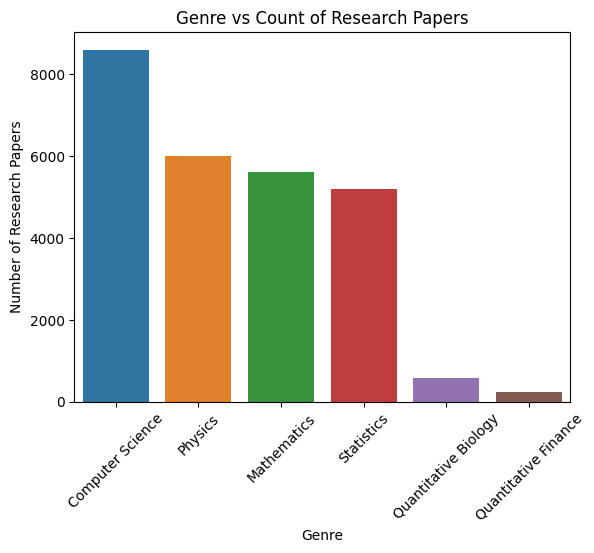

In [ ]:
sns.barplot(x = values.index, y = values.values)
plt.xlabel("Genre")
plt.ylabel("Number of Research Papers")
plt.title("Genre vs Count of Research Papers")
plt.xticks(rotation = 45)
plt.show()

Data Transformation - Miscellaneous and Dropping Columns

In [ ]:
train_df['Miscellaneous'] = train_df['Quantitative Biology'] & train_df['Quantitative Finance']

In [ ]:
train_df = train_df.drop(['Quantitative Biology', 'Quantitative Finance'],axis = 1)


In [ ]:
train_df = train_df.drop(['TITLE', 'ABSTRACT'],axis = 1)
test_df = test_df.drop(['TITLE', 'ABSTRACT'],axis = 1)


Data Visualization - Length of Texts

X-axis - length of the text ||
Y-axis - index of the text || Indentify the patterns or outliners

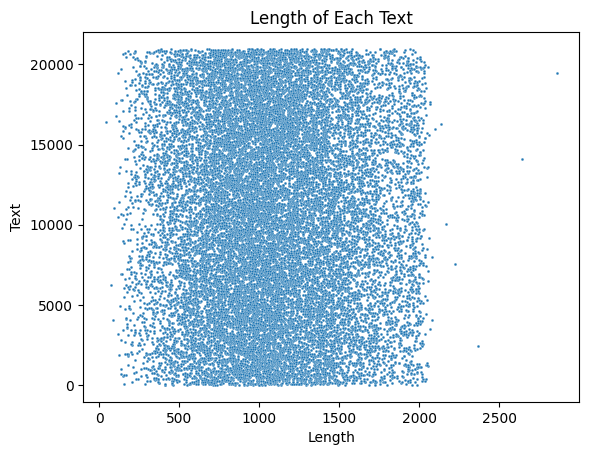

In [ ]:
import seaborn as sns

sns.scatterplot(x=train_df['Text'].str.len(), y=train_df.index, s=4)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Length of Each Text')
plt.show()


Creating a new variable corpus that contains contents of text

In [ ]:
corpus = train_df['Text']

converts the corpus variable into a Python list, Some libraries or functions may expect data in list format

In [ ]:

corpus = corpus.to_list()

Word Cloud Visualization - size of each word in the cloud proportional to its frequency

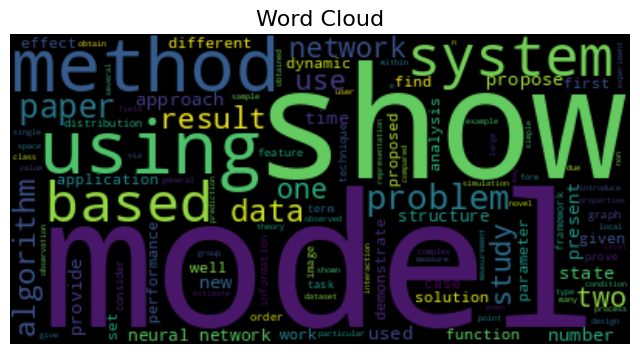

In [ ]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS).generate(' '.join(corpus))

fig, ax = plt.subplots(figsize=(8, 8))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Word Cloud', fontsize=16)
ax.axis('off')

# Show the plot
plt.show()


In [ ]:
corpus[4]

'Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants. Fourier-transform infra-red (FTIR) spectra of samples from 7 plant species were used to explore the influence of preprocessing and feature extraction on efficiency of machine learning algorithms. Wavelet Tensor Train (WTT) and Discrete Wavelet Transforms (DWT) were compared as feature extraction techniques for FTIR data of medicinal plants. Various combinations of signal processing steps showed different behavior when applied to classification and clustering tasks. Best results for WTT and DWT found through grid search were similar, significantly improving quality of clustering as well as classification accuracy for tuned logistic regression in comparison to original spectra. Unlike DWT, WTT has only one parameter to be tuned (rank), making it a more versatile and easier to use as a data processing tool in various signal processing application

Remove irrelevant numeric data for text analysis, replace digits with empty strings to remove noise and irrelevant information

In [ ]:
def remove_number(text):
    pattern = r"\d"
    result = re.sub(pattern, "", text)
    return result
corpus = [remove_number(document) for document in corpus]


Text preprocessing -> tokenize text to sentences -> words. POS tagging -> NN/JJ. The processed text becomes more focused and informative, better suited for NLP tasks.

In [ ]:
def extract_nouns_and_adjectives(text):

    sentences = nltk.sent_tokenize(text)
    words = [nltk.word_tokenize(sentence) for sentence in sentences]

    tagged_words = [nltk.pos_tag(word) for word in words]

    document = []

    for tagged_sentence in tagged_words:
        for word, tag in tagged_sentence:
            if tag.startswith('NN') or tag.startswith('JJ'):
                document.append(word)

    return ' '.join(document)

 NLTK data package for tokenization.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Package for POS tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
corpus = [extract_nouns_and_adjectives(document) for document in corpus]

Lemmatization - reducing words to their base or dictionary form

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus_stem = [' '.join([lemmatizer.lemmatize(token) for token in document.split(" ")]) for document in corpus]
corpus_stem[0]



'Subject-Specific Effect Maps Predictive model subject-specific inference disease related alteration data subject data inference level global i.e condition presence subject local i.e condition effect individual measurement subject data global inference local inference subject-specific effect map model noisy detection dispersed isolated island article reconstruction method RSM subject-specific detection predictive modeling approach particular binary classifier RSM noise due error finite sample example classifier method wrapper-type algorithm different binary classifier diagnostic manner i.e information condition presence Reconstruction Maximum-A-Posteriori problem prior model parameter data classifier-specific fashion Experimental evaluation data data Alzheimer Disease Neuroimaging Initiative ADNI database Results synthetic data demonstrate RSM yield higher detection accuracy model bootstrap averaging Analyses ADNI dataset show RSM correlation subject-specific detection cortical thickne

--TF-IDF Vectorization, each vector represents a document, converts text data to numerical vectors, quantifies the importance of words in documents

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 10000)
tfidf_vectors = vectorizer.fit_transform(corpus_stem)
tfidf_vectors.shape


tfidf_tokens = vectorizer.get_feature_names_out()
tfidf_tokens

array(['_a', '_c', '_d', ..., 'zsl', 'zygmund', 'étale'], dtype=object)

LDA Model

In [ ]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, random_state=11, learning_method="online")
"""fits the LDA model to the TF-IDF vectors, which are the input features for topic modeling."""
lda_vec = lda.fit_transform(tfidf_vectors)
lda_vec
""" identifies the dominant topic for each document by finding the topic with the highest probability in the LDA output"""
lda_cluster  = np.argmax(lda_vec, axis=1)
train_df.columns

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Text',
       'Miscellaneous'],
      dtype='object')

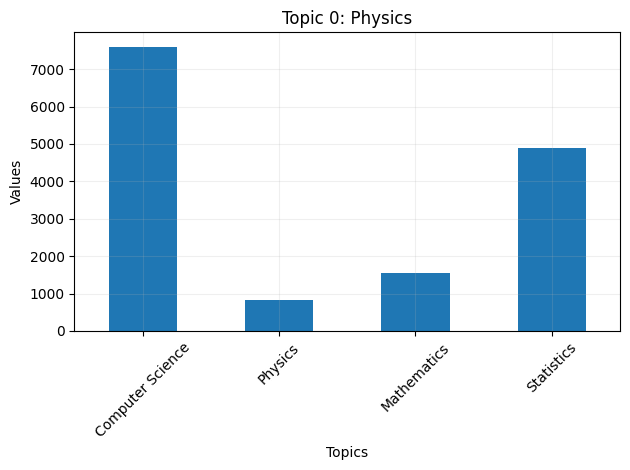

In [ ]:
train_df.loc[np.where(lda_cluster == 0)[0].tolist(),['Computer Science', 'Physics', 'Mathematics', 'Statistics']].sum(axis = 0).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title("Topic 0: Physics")
plt.ylabel("Values")
plt.xlabel("Topics")
plt.tight_layout()
plt.grid(alpha = 0.2)
plt.show()

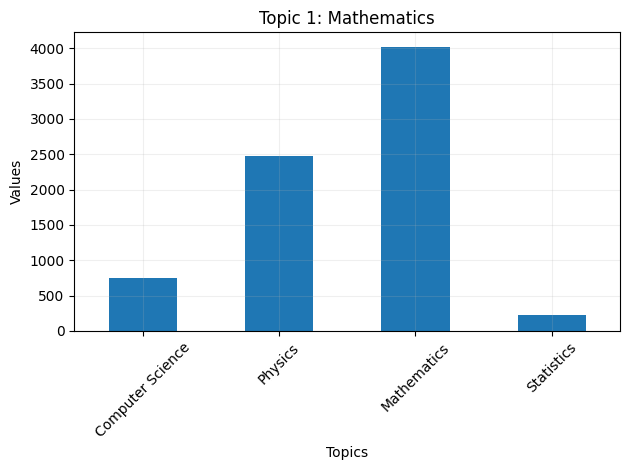

In [ ]:
train_df.loc[np.where(lda_cluster == 1)[0].tolist(),['Computer Science', 'Physics', 'Mathematics', 'Statistics']].sum(axis = 0).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title("Topic 1: Mathematics")
plt.xlabel("Topics")
plt.ylabel("Values")
plt.tight_layout()
plt.grid(alpha = 0.2)
plt.show()

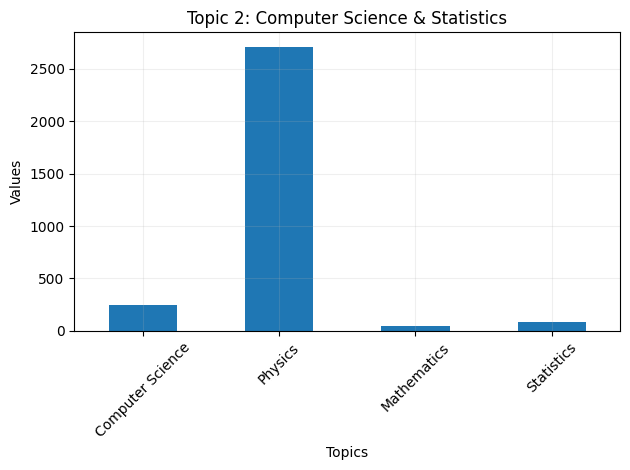

In [ ]:


train_df.loc[np.where(lda_cluster == 2)[0].tolist(),['Computer Science', 'Physics', 'Mathematics', 'Statistics']].sum(axis = 0).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title("Topic 2: Computer Science & Statistics")
plt.ylabel("Values")
plt.xlabel("Topics")
plt.tight_layout()
plt.grid(alpha = 0.2)
plt.show()



## **Test Data Preparation**

In [ ]:
test_corpus = test_df['Text']

In [ ]:
test_corpus

ID
0       Closed-form Marginal Likelihood in Gamma-Poiss...
1       Laboratory mid-IR spectra of equilibrated and ...
2       Case For Static AMSDU Aggregation in WLANs Fra...
3       The $Gaia$-ESO Survey: the inner disk intermed...
4       Witness-Functions versus Interpretation-Functi...
                              ...                        
8984    Supporting mixed-datatype matrix multiplicatio...
8985    An axiomatic basis for Blackwell optimality In...
8986    GeneVis - An interactive visualization tool fo...
8987    Quantifying the causal effect of speed cameras...
8988    Cube-magic labelings of grids We show that the...
Name: Text, Length: 8989, dtype: object

Text Classification - Predicting Topics for Test Data

In [ ]:
test_corpus = test_corpus.to_list()
test_corpus = [remove_number(document) for document in test_corpus]
test_corpus = [extract_nouns_and_adjectives(document) for document in test_corpus]
test_corpus_stem = [' '.join([lemmatizer.lemmatize(token) for token in document.split(" ")]) for document in test_corpus]
tfidf_test_vectors = vectorizer.transform(test_corpus_stem)
tfidf_test_vectors.toarray()
test_topic_distribution = lda.transform(tfidf_test_vectors)
test_topic_distribution

array([[0.83610013, 0.10844805, 0.05545183],
       [0.05802291, 0.07866834, 0.86330875],
       [0.84658221, 0.06126872, 0.09214906],
       ...,
       [0.87796937, 0.05996697, 0.06206366],
       [0.86720629, 0.04694676, 0.08584695],
       [0.16970137, 0.69350094, 0.13679769]])

In [ ]:
lda_test_cluster = np.argmax(test_topic_distribution, axis = 1)
lda_test_cluster
temp_df = test_df.loc[np.where(lda_test_cluster == 0)[0].tolist(),]


In [ ]:

count = 0
for index,data in temp_df.iterrows():
    if (count > 3):
        break
    print(data.Text + "\n")
    count += 1




Closed-form Marginal Likelihood in Gamma-Poisson Matrix Factorization We present novel understandings of the Gamma-Poisson (GaP) model, a probabilistic matrix factorization model for count data. We show that GaP can be rewritten free of the score/activation matrix. This gives us new insights about the estimation of the topic/dictionary matrix by maximum marginal likelihood estimation. In particular, this explains the robustness of this estimator to over-specified values of the factorization rank, especially its ability to automatically prune irrelevant dictionary columns, as empirically observed in previous work. The marginalization of the activation matrix leads in turn to a new Monte Carlo Expectation-Maximization algorithm with favorable properties.

Case For Static AMSDU Aggregation in WLANs Frame aggregation is a mechanism by which multiple frames are combined into a single transmission unit over the air. Frames aggregated at the AMSDU level use a common CRC check to enforce integ

In [ ]:
temp_df = test_df.loc[np.where(lda_test_cluster == 1)[0].tolist(),]
count = 0
for index,data in temp_df.iterrows():
    if (count > 3):
        break
    print(data.Text + "\n")
    count += 1


A Variational Characterization of Fluid Sloshing with Surface Tension We consider the sloshing problem for an incompressible, inviscid, irrotational fluid in an open container, including effects due to surface tension on the free surface. We restrict ourselves to a constant contact angle and seek time-harmonic solutions of the linearized problem, which describes the time-evolution of the fluid due to a small initial disturbance of the surface at rest. As opposed to the zero surface tension case, where the problem reduces to a partial differential equation for the velocity potential, we obtain a coupled system for the velocity potential and the free surface displacement. We derive a new variational formulation of the coupled problem and establish the existence of solutions using the direct method from the calculus of variations. We prove a domain monotonicity result for the fundamental sloshing eigenvalue. In the limit of zero surface tension, we recover the variational formulation of t

In [ ]:
temp_df = test_df.loc[np.where(lda_test_cluster == 2)[0].tolist(),]
count = 0
for index,data in temp_df.iterrows():
    if (count > 3):
        break
    print(data.Text + "\n")
    count += 1

Laboratory mid-IR spectra of equilibrated and igneous meteorites. Searching for observables of planetesimal debris Meteorites contain minerals from Solar System asteroids with different properties (like size, presence of water, core formation). We provide new mid-IR transmission spectra of powdered meteorites to obtain templates of how mid-IR spectra of asteroidal debris would look like. This is essential for interpreting mid-IR spectra of past and future space observatories, like the James Webb Space Telescope. We show that the transmission spectra of wet and dry chondrites, carbonaceous and ordinary chondrites and achondrite and chondrite meteorites are distinctly different in a way one can distinguish in astronomical mid-IR spectra. The two observables that spectroscopically separate the different meteorites groups (and thus the different types of parent bodies) are the pyroxene-olivine feature strength ratio and the peak shift of the olivine spectral features due to an increase in 

In [ ]:
import pickle

# Assuming you have a trained model object named "model"
# and you want to save it to a file named "model.pkl"

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(lda, file)


In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.1 MB/s eta 0:00:00


## Topic Modeling using BERT

Reading dataset

In [ ]:
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/test.csv')
data.head()

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   
3  20976  The $Gaia$-ESO Survey: the inner disk intermed...   
4  20977  Witness-Functions versus Interpretation-Functi...   

                                            ABSTRACT  
0    We present novel understandings of the Gamma...  
1    Meteorites contain minerals from Solar Syste...  
2    Frame aggregation is a mechanism by which mu...  
3    Milky Way open clusters are very diverse in ...  
4    Proving that a cryptographic protocol is cor...

Access the title column and split the text into words using spaces and then counting the number of resulting words.

In [ ]:
# Create a new column containing the length each headline text
data["abstract_text_len"] = data["TITLE"].apply(lambda x : len(x.split()))

The longest abstract has: 38 words


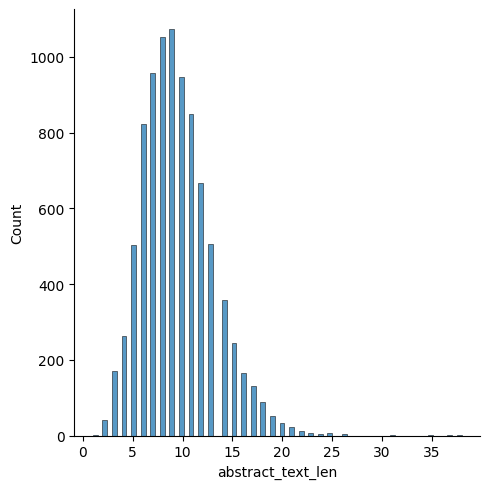

In [ ]:
print("The longest abstract has: {} words".format(data.abstract_text_len.max()))

# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.abstract_text_len, kde=False)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
!pip install bertopic

In [ ]:
%%time
"""importing bertopic class from library """
from bertopic import BERTopic
"""specifies the pre-trained BERT-like embedding model (paraphrase-MiniLM-L3-v2) to be used for topic modeling, Topics with fewer than 7 documents will not be created."""
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
"""applies the BERTopic model to the headline data and stores the resulting topics in the headline_topics"""
headline_topics, _ = model.fit_transform(data.TITLE)

Batches:   0%|          | 0/281 [00:00<?, ?it/s]

2023-10-31 03:25:10,777 - BERTopic - Transformed documents to Embeddings
2023-10-31 03:25:31,847 - BERTopic - Reduced dimensionality
2023-10-31 03:25:32,589 - BERTopic - Clustered reduced embeddings


CPU times: user 1min 45s, sys: 773 ms, total: 1min 45s
Wall time: 2min


Returns info abt topics discovered, displays the count

In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 188


Topic  Count                                     Name  \
0     -1   3884                        -1_of_the_and_for   
1      0    219               0_flow_flows_stokes_navier   
2      1    116  1_magnetic_spin_magnetization_magnetism   
3      2    111        2_robot_robotic_robots_navigation   
4      3     98          3_neural_networks_deep_training   

                                      Representation  \
0  [of, the, and, for, in, with, on, to, learning...   
1  [flow, flows, stokes, navier, turbulence, wave...   
2  [magnetic, spin, magnetization, magnetism, hei...   
3  [robot, robotic, robots, navigation, control, ...   
4  [neural, networks, deep, training, network, ar...   

                                 Representative_Docs  
0  [Improving Value-at-Risk prediction under mode...  
1  [On $W^{1,p}$-regularity estimate for a class ...  
2  [Observation of Various and Spontaneous Magnet...  
3  [Human Robot Interface for Assistive Grasping,...  
4  [Vector Field Based Neural Networks, Training ...

display a list of words and their c-TF-IDF scores for the specified topic

In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('flow', 0.0301543649541824),
 ('flows', 0.02670878515170716),
 ('stokes', 0.026225868846433718),
 ('navier', 0.023340646628471202),
 ('turbulence', 0.022748941973937575),
 ('waves', 0.02109817574858614),
 ('fluid', 0.018872803026969),
 ('water', 0.017587803128927916),
 ('turbulent', 0.01596931312811304),
 ('numerical', 0.01449447442393804)]

In [ ]:
model.visualize_barchart(top_n_topics=20)

map that shows which topics are closer to each other in terms of content.

In [ ]:
model.visualize_topics()

Root and sub topics

In [ ]:
model.visualize_hierarchy(top_n_topics=30)

Find top 3 similar topics to physics

In [ ]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("physics", top_n = 3)

In [ ]:
similar_topics

[84, 56, 1]

Displays similarity score

In [ ]:


most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('scattering', 0.15053146551666402), ('electromagnetic', 0.08778080827673607), ('collisions', 0.07022464662138886), ('rayleigh', 0.040145687358473944), ('abcd', 0.029278420456750703), ('pedestal', 0.029278420456750703), ('donuts', 0.029278420456750703), ('colliders', 0.029278420456750703), ('flexural', 0.029278420456750703), ('flr', 0.029278420456750703)]
Similarity Score: 0.49323588609695435
